In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})

In [4]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [5]:
data5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/bad_restart/01jan18/SalishSea_1h_20180101_20180105_grid_T.nc')

In [12]:
def planview(base, field, it, ide, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 30  # width of domain plotted

    data = base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    
    pc = axs.pcolormesh(data.x, data.y, data.values, cmap=cmap, norm = norm_data)
    
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
  
    
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title(f'Jan18 {field}')
    axs.scatter(304 - 280, 446 - 430, marker = '*', color = 'yellow')
    axs.scatter(304 - 280, 447 - 430, marker = '*', color = 'yellow')
    axs.scatter(305 - 280, 446 - 430, marker = '*', color = 'yellow')
    axs.scatter(305 - 280, 447 - 430, marker = '*', color = 'yellow')
    plt.show()

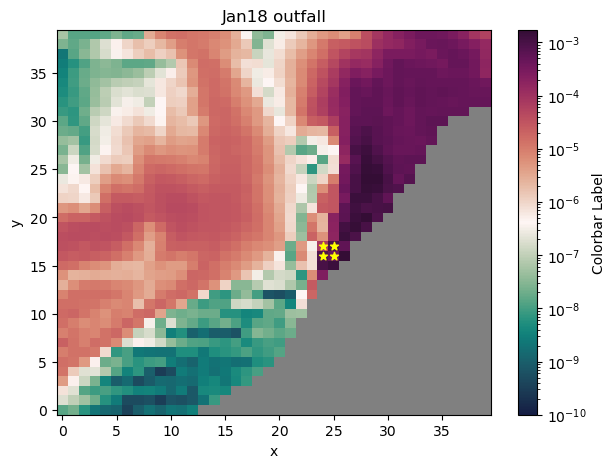

In [13]:
planview(data5, 'outfall', 119, 23, cm_vel)

In [8]:
def verticalview(base, field, it, dep, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 30  # width of domain plotted

    data = base[field][it, :29, dep, 250+iz:350-iz]

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    
    pc = axs.pcolormesh(data.x, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values

    axs.invert_yaxis()

    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('depth')
    axs.set_title(f'Jan18 {field}')
    axs.scatter(304 - 280, 98, marker = '*', color = 'yellow')
    axs.scatter(305 - 280, 76, marker = '*', color = 'yellow')
    plt.show()

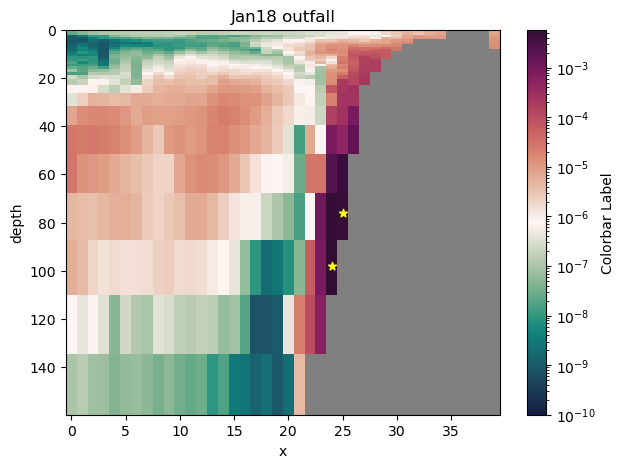

In [9]:
verticalview(data5, 'outfall', 119, 446, cm_vel)

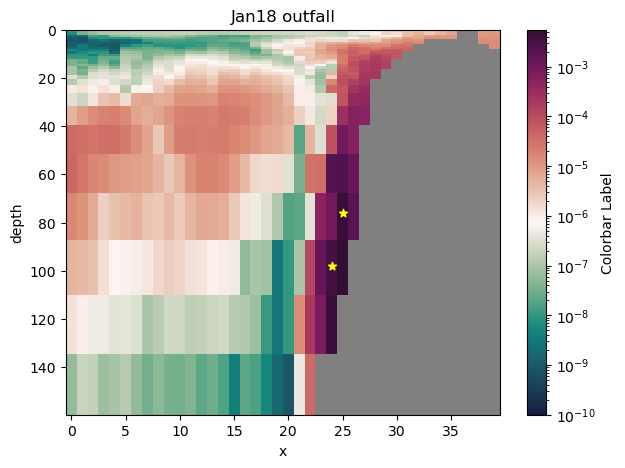

In [10]:
verticalview(data5, 'outfall', 119, 447, cm_vel)

In [18]:
def vertical_view_x(base, field, it, dep,  cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 30  # width of domain plotted

    data = base[field][it, :29, 400+iz:500-iz, dep]

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    
    pc = axs.pcolormesh(data.y, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values

    axs.invert_yaxis()
    
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    
    # Set labels and title
    axs.set_xlabel('y')
    axs.set_ylabel('log-depth')
    axs.set_title(f'Jan18 {field}')
    
    axs.scatter(447 - 430, 98, marker = '*', color = 'yellow')
    axs.scatter(446 - 430, 76, marker = '*', color = 'yellow')

    
    plt.show()

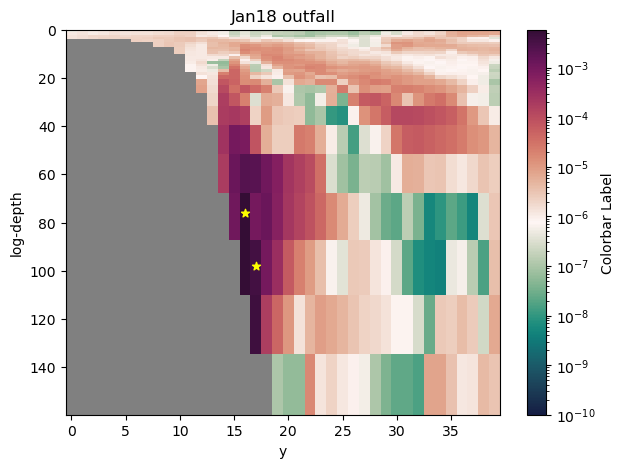

In [19]:
vertical_view_x(data5, 'outfall', 119, 304,  cm_vel)

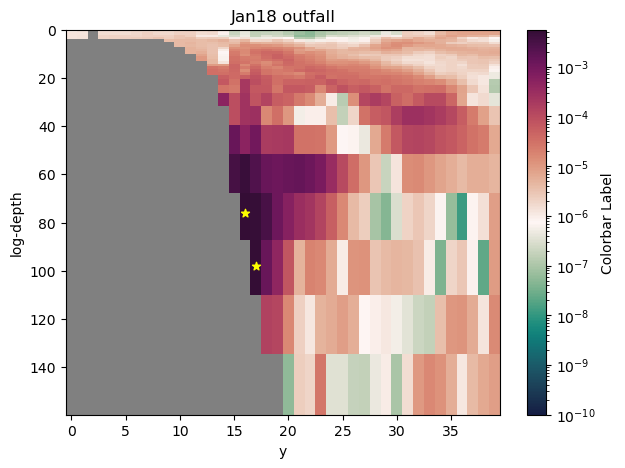

In [20]:
vertical_view_x(data5, 'outfall', 119, 305,  cm_vel)

In [5]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
data_slice = data5.isel(deptht = slice(0, 29), y = y_slice, x = x_slice)

In [37]:
def plotTimeSeries(base, field, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(12, 5))
    sum_data = base[field].sum(dim = ["y", "x"])

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=sum_data.values.min() + offset, vmax=sum_data.values.max() + offset)

    sum_data.plot(ax =axs, y = "deptht", yincrease = False, cmap=cmp, norm = norm_data, shading='auto')
    
    axs.set_title(f'Tands {field}')
    
    plt.show()

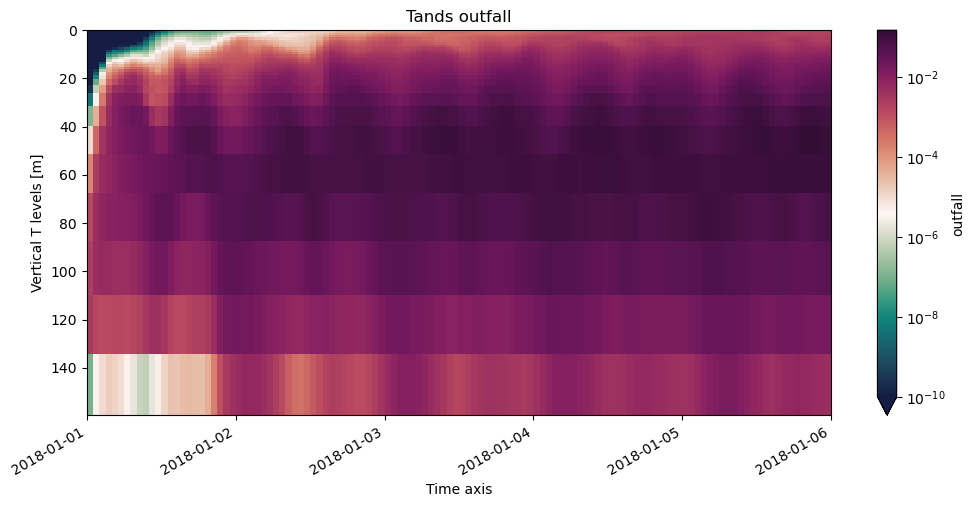

In [38]:
plotTimeSeries(data_slice, 'outfall', cm_vel)

In [5]:
data5_p1 = data5.sel(deptht = 121.866516, y = 447, x = 304)


data5_p2 = data5.sel(deptht = 98.06296, y = 446, x = 304)


data5_p3= data5.sel(deptht = 98.06296, y = 447, x = 305)


data5_p4= data5.sel(deptht = 76.58559, y = 446, x = 305)


Text(0, 0.5, 'Outfall')

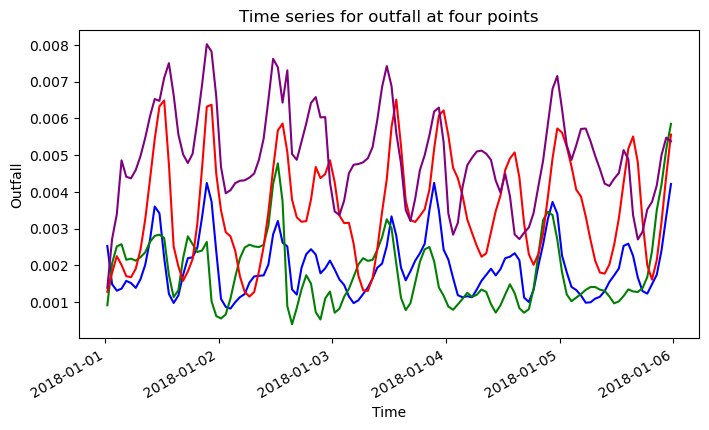

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = data5_p1.outfall 
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = data5_p2.outfall 
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = data5_p3.outfall 
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = data5_p4.outfall 
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for outfall at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Outfall')

In [6]:
def plotTimeSeriesLine(base, field, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(12, 5))
    sum_data = base[field].sum(dim = ["y", "x"])
    max_depth = sum_data.argmax(dim = 'deptht')
    min_depth = sum_data.argmin(dim='deptht') 
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=sum_data.values.min() + offset, vmax=sum_data.values.max() + offset)
    sum_data.plot(ax =axs, y = "deptht", yincrease = False, cmap=cmp, norm = norm_data, shading='auto')
    axs.set_title(f'Tands {field}')
    axs.plot(sum_data['time_counter'], sum_data['deptht'][max_depth], 'r-')
    axs.plot(sum_data['time_counter'], sum_data['deptht'][min_depth], 'b-')
    axs.set_ylim(150, 0)
    plt.show()

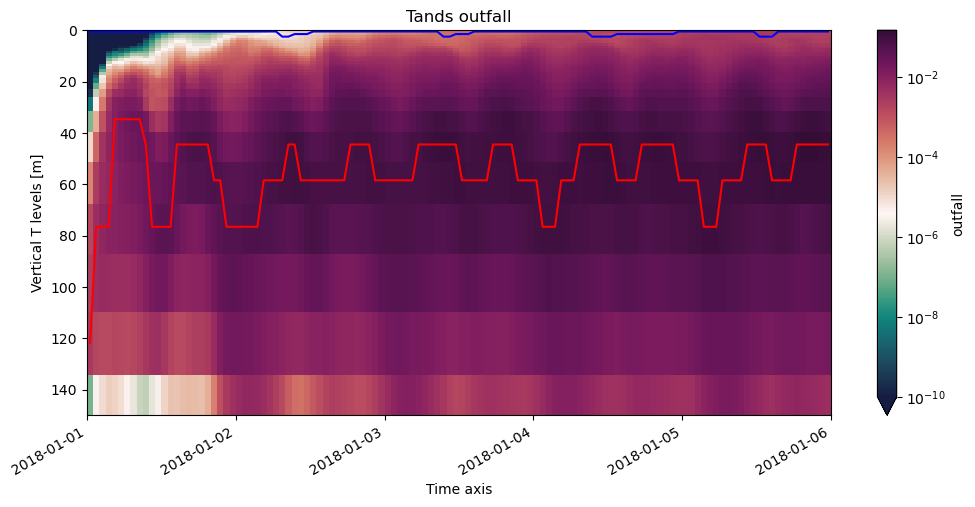

In [7]:
plotTimeSeriesLine(data_slice, 'outfall', cm_vel)